#**Convolution Neural Network using TensorFlow**

**Import neccessary packages**

In [51]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

**Loading the Dataset**

In [52]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Preporcess the data**

In [54]:
x_train,x_test=x_train/255.0,x_test/255.0

**Built the model**

In [56]:
model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [57]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Training Model**

In [58]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.3631 - loss: 1.7203 - val_accuracy: 0.5959 - val_loss: 1.1310
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5979 - loss: 1.1292 - val_accuracy: 0.6518 - val_loss: 0.9924
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6628 - loss: 0.9545 - val_accuracy: 0.6764 - val_loss: 0.9440
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7065 - loss: 0.8390 - val_accuracy: 0.6784 - val_loss: 0.9580
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7360 - loss: 0.7540 - val_accuracy: 0.6852 - val_loss: 0.9495
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7643 - loss: 0.6819 - val_accuracy: 0.6796 - val_loss: 1.0028
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7879 - loss: 0.6153 - val_accuracy: 0.6844 - val_loss: 1.0399
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8093 - loss: 0.548

**Evaluating the Model**

In [59]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print("Test accuracy:",test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6672 - loss: 1.2534
Test accuracy: 0.6672000288963318


**Testing of the model**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


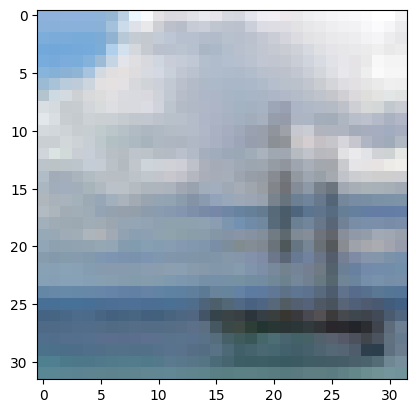

prediction label: 8


In [60]:
import random
index=random.randint(0,len(x_test)-1)
prediction=model.predict(np.expand_dims(x_test[index],axis=0))
plt.imshow(x_test[index])
plt.show()
print("prediction label:",np.argmax(prediction))